# Importing the libraries/modules we need

In [1]:
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

YFINANCE DOCUMENTATION:<br>
https://pypi.org/project/yfinance/

# Collecting stock data

In [3]:
tsla = yf.Ticker("TSLA")

In [4]:
tsla = tsla.history(period='2y')

In [5]:
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-13 00:00:00-04:00,225.500000,242.059998,225.033340,237.039993,97954500,0.0,0.0
2022-07-14 00:00:00-04:00,234.896667,238.653336,229.333328,238.313339,78557400,0.0,0.0
2022-07-15 00:00:00-04:00,240.000000,243.623337,236.889999,240.066666,69683100,0.0,0.0
2022-07-18 00:00:00-04:00,244.936661,250.516663,239.603333,240.546661,82537500,0.0,0.0
2022-07-19 00:00:00-04:00,245.000000,247.139999,236.976669,245.529999,80890200,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-08 00:00:00-04:00,247.710007,259.440002,244.570007,252.940002,157219600,0.0,0.0
2024-07-09 00:00:00-04:00,251.000000,265.609985,250.300003,262.329987,160210900,0.0,0.0
2024-07-10 00:00:00-04:00,262.799988,267.589996,257.859985,263.260010,128519400,0.0,0.0


# Fitting a regression model

### Data cleaning

In [6]:
tsla = tsla[['Open']]
tsla = tsla.reset_index(drop=True)

### Line fitting and dataviz

#### WARNING! THIS IS FOR FUN ONLY -- DON'T USE THIS (STUPIDLY SIMPLE) MODEL FOR ACTUAL STOCK PRICE PREDICTION!

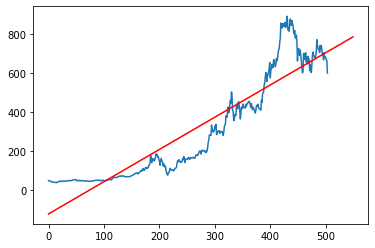

In [7]:
#LINE FITTING
x = tsla.index
y = tsla.Open
model = np.polyfit(x, y, 1) #change 1 to other integers to change the fitted line

#PREDICTING
predict = np.poly1d(model)

#DATAVIZ
x_pol_reg = range(0, 550)
y_pol_reg = predict(x_pol_reg)
plt.plot(x, y)
plt.plot(x_pol_reg, y_pol_reg, c = 'r')

In [8]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.8464831161340012

# Collecting data for other financial assets


In [6]:
euro_usd = yf.Ticker("EURUSD=X")
euro_usd.history(period='2y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-12 00:00:00+01:00,1.004753,1.007384,1.000110,1.004753,0,0.0,0.0
2022-07-13 00:00:00+01:00,1.003311,1.011624,0.999890,1.003311,0,0.0,0.0
2022-07-14 00:00:00+01:00,1.003271,1.004924,0.995362,1.003271,0,0.0,0.0
2022-07-15 00:00:00+01:00,1.002567,1.009795,1.001061,1.002567,0,0.0,0.0
2022-07-18 00:00:00+01:00,1.009632,1.019888,1.008237,1.009632,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-08 00:00:00+01:00,1.082603,1.084716,1.081514,1.082603,0,0.0,0.0
2024-07-09 00:00:00+01:00,1.083095,1.083424,1.080625,1.083095,0,0.0,0.0
2024-07-10 00:00:00+01:00,1.081479,1.082872,1.081186,1.081479,0,0.0,0.0


In [10]:
sp500 = yf.Ticker("^GSPC")
sp500.history(period='2y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-13,2840.19,2840.19,2801.43,2811.87,3894030000,0,0
2019-05-14,2820.12,2852.54,2820.12,2834.41,3322720000,0,0
2019-05-15,2820.38,2858.68,2815.08,2850.96,3125950000,0,0
2019-05-16,2855.80,2892.15,2855.80,2876.32,3338060000,0,0
2019-05-17,2858.60,2885.48,2854.23,2859.53,3257950000,0,0
...,...,...,...,...,...,...,...
2021-05-05,4177.06,4187.72,4160.94,4167.59,4029050000,0,0
2021-05-06,4169.14,4202.70,4147.33,4201.62,4504860000,0,0
2021-05-07,4210.34,4238.04,4201.64,4232.60,4013060000,0,0
